In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import numpy as np

In [2]:
df_ROSF = pd.read_csv('../../datasets/RecurrenceOfSurgery_Final.csv')
df_ROSF

,Unnamed: 0.1,Unnamed: 0,환자ID,신장,체중,연령,성별,Large Lymphocyte,우울증여부,종양진행여부,...,디스크위치,척추이동척도,척추전방위증,수술시간,수술실패여부,수술기법,흡연여부,Instability,혈액형,입원기간
0,0,0,1PT,163,60.3,66,2,22.8,0,0,...,4,Down,0,68.0,0,TELD,0,0,RH+A,2
1,1,1,2PT,171,71.7,47,1,44.9,0,0,...,4,Up,0,31.0,0,TELD,0,0,RH+A,1
2,2,2,3PT,178,77.1,39,1,53.0,0,0,...,4,Down,0,78.0,0,TELD,0,0,RH+B,1
3,3,3,4PT,174,74.2,40,1,54.7,0,0,...,4,Down,0,73.0,0,TELD,0,0,RH+O,1
4,4,4,5PT,183,80.7,42,1,53.8,0,0,...,4,Up,0,29.0,0,TELD,0,0,RH+A,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,1889,1889,1890PT,157,64.0,59,2,44.0,0,1,...,5,Middle,0,80.0,0,NaN,0,0,RH+A,2
1890,1890,1890,1891PT,157,59.0,42,2,30.8,0,0,...,4,Down,0,20.0,0,NaN,0,0,RH+B,4
1891,1891,1891,1892PT,167,70.0,61,1,36.7,0,0,...,4,Down,0,50.0,0,IELD,0,0,RH+O,3
1892,1892,1892,1893PT,177,77.0,29,1,32.5,0,0,...,5,Down,0,25.0,0,NaN,0,0,RH+A,4


In [3]:
df_ROSF.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', '환자ID', '신장', '체중', '연령', '성별',
       'Large Lymphocyte', '우울증여부', '종양진행여부', '재발여부', '디스크단면적', '디스크위치',
       '척추이동척도', '척추전방위증', '수술시간', '수술실패여부', '수술기법', '흡연여부', 'Instability',
       '혈액형', '입원기간'],
      dtype='object')

### DDA 
- 목표변수: 입원기간
- '연령' : 나이가 많을 수록 회복력으로 인해 입원기간이 길어질것으로 예상함. 
- 'Large Lymphocyte': 정상수치보다 높아지거나 비정상적으로 높았을때 감염여부로 인해 입원기간이 길어질것으로 예상함. 
- '종양진행여부' : 종양진행정도에 따라 입원기간의 영향이 있지 않을까.. 
- '디스크단면적' : 디스크 단면적에 따라 수술의 시간이 길어져서 입원기간의 영향이 있을것 같았음. 
- '척추이동척도': 척추이동의 정도에 따라 디스크 정도가 다를것같고 이는 입원기간의 영향이 있을것같음. 
- '수술시간': 수술 시간이 길면 그만큼 디스크의 심각함이라 생각했고 이는 입원기간에 영향이 있을것같음. 
- '수술기법' : 수술 기법에 따라 회복력이 다를것으로 예상함. 
- 'Instability': 척추의 안정성이 불안하면 입원기간에 영향이 있을것 같음. 
- '혈액형': 혈액형은 궁금했음. 
        - ( + '성별','우울증여부','종양진행여부','재발여부','디스크위치','척추전방위증','수술실패여부','흡연여부')
- '신장','체중'_BMI

In [4]:
df_ROSF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1894 non-null   int64  
 1   Unnamed: 0        1894 non-null   int64  
 2   환자ID              1894 non-null   object 
 3   신장                1894 non-null   int64  
 4   체중                1894 non-null   float64
 5   연령                1894 non-null   int64  
 6   성별                1894 non-null   int64  
 7   Large Lymphocyte  1894 non-null   float64
 8   우울증여부             1894 non-null   int64  
 9   종양진행여부            1894 non-null   int64  
 10  재발여부              1894 non-null   int64  
 11  디스크단면적            1893 non-null   float64
 12  디스크위치             1894 non-null   int64  
 13  척추이동척도            1894 non-null   object 
 14  척추전방위증            1894 non-null   int64  
 15  수술시간              1840 non-null   float64
 16  수술실패여부            1894 non-null   int64  


In [5]:
# 종양진행여부와 Instability는 int형으로 0, 1로 나눠져있었고 이를 범주형으로 보기 위해 object로 type을 변경함
df_ROSF[['종양진행여부','Instability']] = df_ROSF[['종양진행여부','Instability']].astype(object)

In [6]:
df_ROSF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1894 non-null   int64  
 1   Unnamed: 0        1894 non-null   int64  
 2   환자ID              1894 non-null   object 
 3   신장                1894 non-null   int64  
 4   체중                1894 non-null   float64
 5   연령                1894 non-null   int64  
 6   성별                1894 non-null   int64  
 7   Large Lymphocyte  1894 non-null   float64
 8   우울증여부             1894 non-null   int64  
 9   종양진행여부            1894 non-null   object 
 10  재발여부              1894 non-null   int64  
 11  디스크단면적            1893 non-null   float64
 12  디스크위치             1894 non-null   int64  
 13  척추이동척도            1894 non-null   object 
 14  척추전방위증            1894 non-null   int64  
 15  수술시간              1840 non-null   float64
 16  수술실패여부            1894 non-null   int64  


#### 입원기간
- 연속형?/범주형?

In [7]:
df_ROSF['입원기간'].describe()

count    1894.000000
mean        1.736536
std         2.344085
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        51.000000
Name: 입원기간, dtype: float64

In [8]:
df_ROSF['입원기간'].value_counts()

입원기간
1     1152
2      483
3      180
4       39
8        6
5        6
6        4
7        4
0        3
17       3
11       3
27       1
46       1
9        1
18       1
16       1
44       1
13       1
15       1
51       1
12       1
10       1
Name: count, dtype: int64

C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='입원기간'>

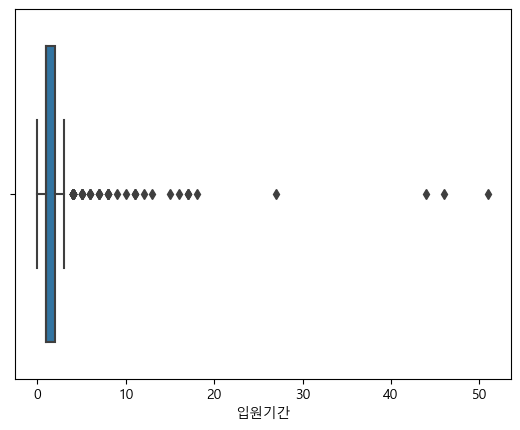

In [9]:
sns.boxplot(data=df_ROSF,x='입원기간')

C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='입원기간', ylabel='count'>

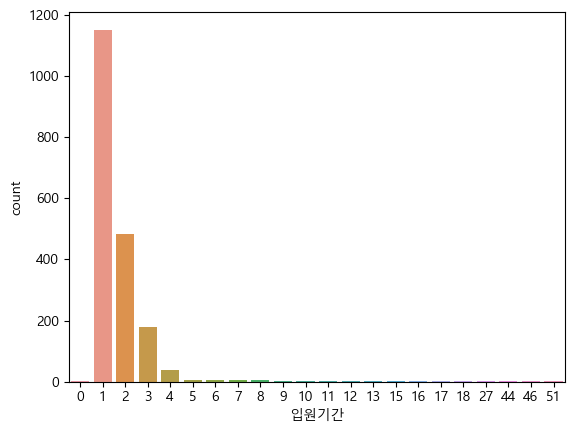

In [10]:
sns.countplot(data=df_ROSF,x='입원기간')

#### 연령
- 연속형

In [11]:
df_ROSF['연령'].describe()

count    1894.000000
mean       41.463569
std        13.444629
min        15.000000
25%        32.000000
50%        41.000000
75%        49.000000
max        86.000000
Name: 연령, dtype: float64

In [12]:
Q1 = df_ROSF['연령'].describe()['25%']
Q3 = df_ROSF['연령'].describe()['75%']
IQR = Q3-Q1

In [13]:
bound_up = Q3 + 1.5 *IQR
bound_down = Q1 - 1.5 *IQR
bound_down, bound_up

(6.5, 74.5)

C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='연령'>

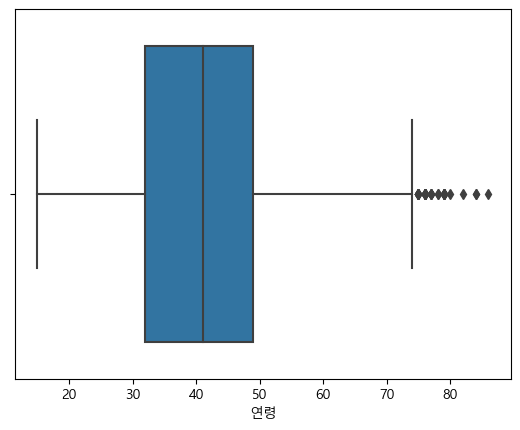

In [14]:
sns.boxplot(data=df_ROSF,x='연령')

C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='연령', ylabel='Count'>

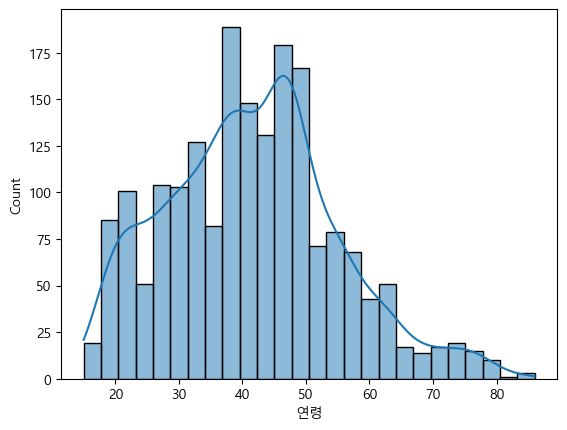

In [15]:
sns.histplot(data=df_ROSF,x='연령', kde=True)

#### Large Lymphocyte
- 정상범위 1500~4500/ul
- 실제 data: 44.9-5.4 : 수치는 *10^2이라 생각해야할듯
- 연속형

In [16]:
df_ROSF['Large Lymphocyte'].describe

<bound method NDFrame.describe of 0       22.8
1       44.9
2       53.0
3       54.7
4       53.8
        ... 
1889    44.0
1890    30.8
1891    36.7
1892    32.5
1893    49.5
Name: Large Lymphocyte, Length: 1894, dtype: float64>

C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Large Lymphocyte'>

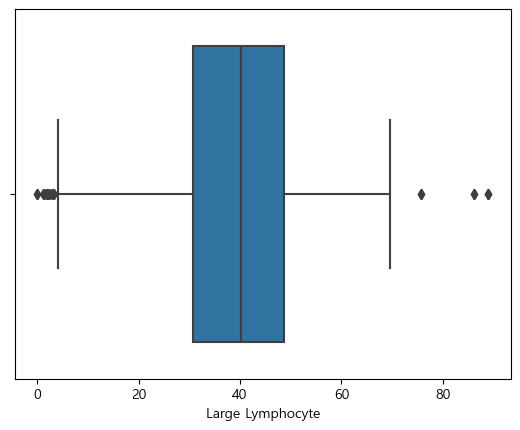

In [17]:
sns.boxplot(data=df_ROSF, x='Large Lymphocyte')

C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Large Lymphocyte', ylabel='Count'>

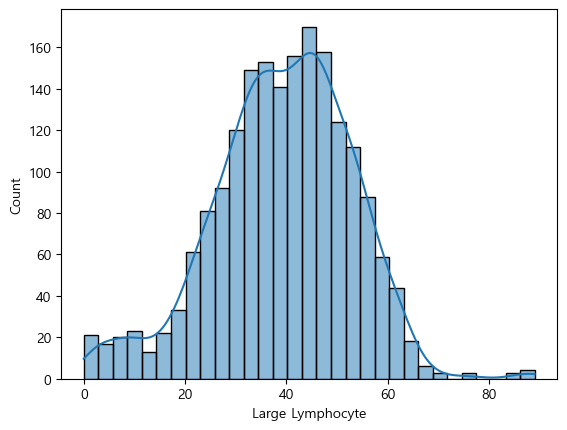

In [18]:
sns.histplot(data=df_ROSF,x='Large Lymphocyte', kde=True)

#### 종양진행여부
- 0: 없음
- 1: 있음
- 범주형

In [19]:
df_ROSF['종양진행여부'].value_counts()

종양진행여부
0    1888
1       6
Name: count, dtype: int64

C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='종양진행여부', ylabel='count'>

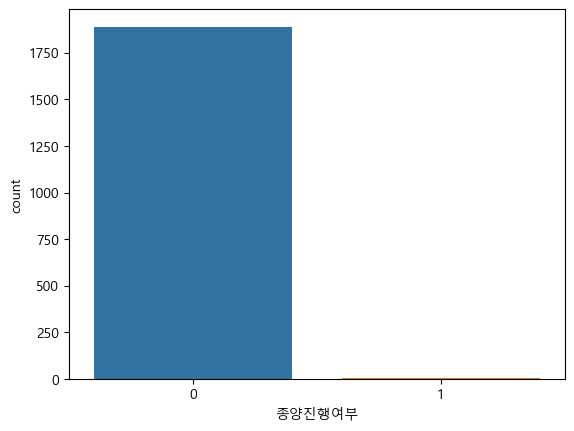

In [20]:
sns.countplot(data=df_ROSF, x='종양진행여부')

#### 디스크단면적
- 연속형
- 50 - 200 px^2

In [21]:
df_ROSF['디스크단면적'].describe()

count    1893.000000
mean     1989.788774
std       314.478436
min      1145.800000
25%      1777.000000
50%      1985.500000
75%      2178.500000
max      3214.200000
Name: 디스크단면적, dtype: float64

C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='디스크단면적'>

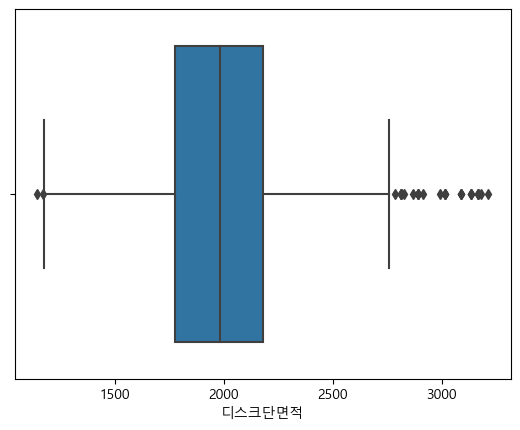

In [22]:
sns.boxplot(data=df_ROSF,x='디스크단면적')

C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='디스크단면적', ylabel='Count'>

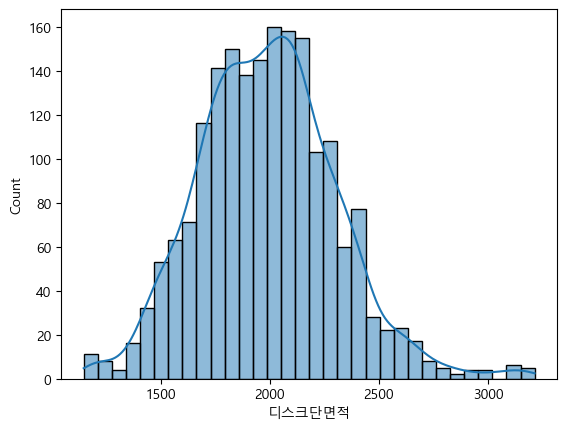

In [23]:
sns.histplot(data=df_ROSF,x='디스크단면적', kde=True)

#### 척추이동척도
- Middle, Down, Up, Extremely down, Extremely up
- 범주형


In [24]:
df_ROSF['척추이동척도'].value_counts()

척추이동척도
Middle            1260
Down               513
Up                  65
Extremely down      40
Extremely up        16
Name: count, dtype: int64

C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='척추이동척도', ylabel='count'>

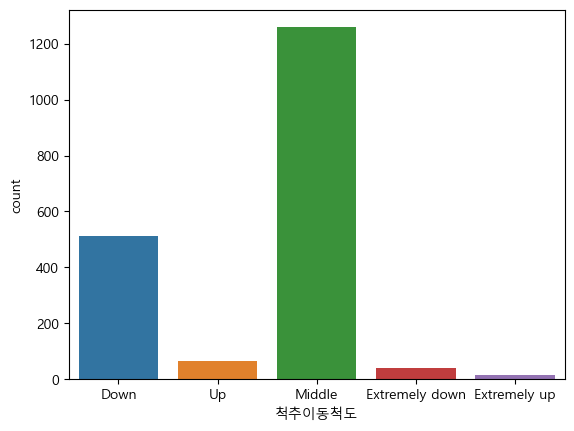

In [25]:
sns.countplot(data=df_ROSF, x='척추이동척도')

#### 수술시간
- 연속형

In [26]:
df_ROSF['수술시간'].describe()

count    1840.000000
mean       62.066304
std        24.994615
min         5.000000
25%        45.000000
50%        60.000000
75%        77.000000
max       220.000000
Name: 수술시간, dtype: float64

C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='수술시간'>

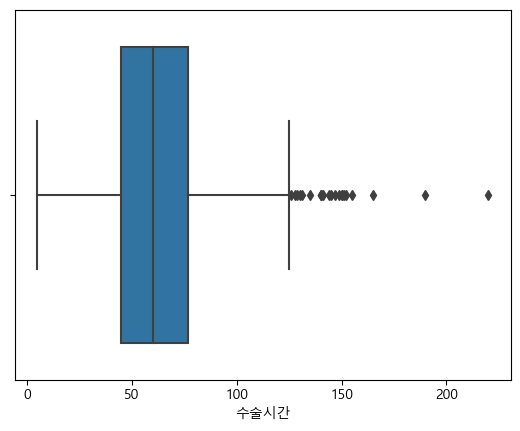

In [27]:
sns.boxplot(data=df_ROSF,x='수술시간')

C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='수술시간', ylabel='Count'>

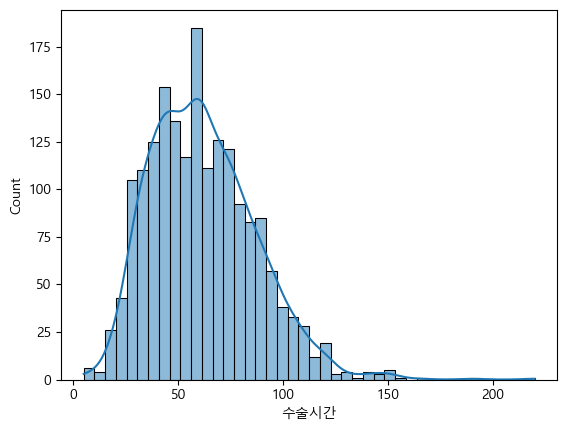

In [28]:
sns.histplot(data=df_ROSF,x='수술시간', kde=True)

#### 수술기법
- 용어 검색: 뤼튼 
- TELD_ Tubular Epidural Lumbar Discectomy
             - 삽입되는 튜브를 통해 디스크 파편 제거 
- IELD_ Intervertebral Endoscopic Lumbar Discectomy
            - 내시경 이용하여 디스크 조직 제거
- 범주형 

In [29]:
df_ROSF['수술기법'].value_counts()

수술기법
TELD    1673
IELD     140
Name: count, dtype: int64

C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='수술기법', ylabel='count'>

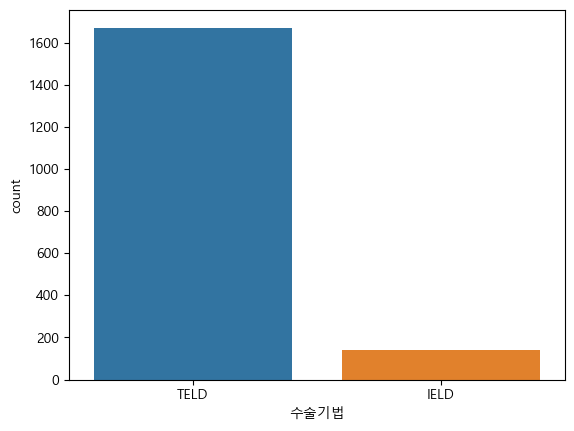

In [30]:
sns.countplot(data=df_ROSF, x='수술기법')

#### Instability
- 척추 안정성
- 0 : 안정성 없음
- 1: 안정성 있음
- 범주형

In [31]:
df_ROSF['Instability'].value_counts()

Instability
0    1817
1      77
Name: count, dtype: int64

C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Instability', ylabel='count'>

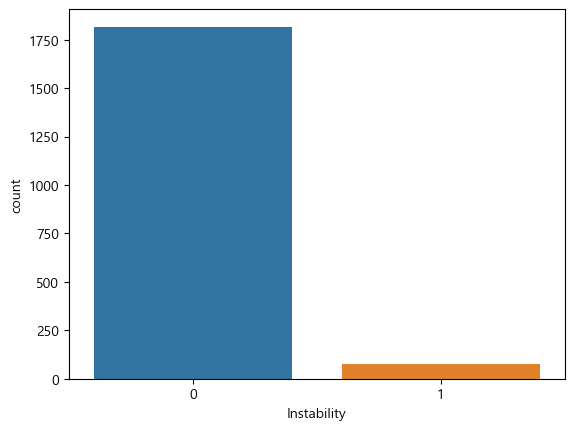

In [32]:
sns.countplot(data=df_ROSF, x='Instability')

#### 혈액형
- 범주형

In [33]:
df_ROSF['혈액형'].value_counts()

혈액형
RH+A     688
RH+O     532
RH+B     476
RH+AB    198
Name: count, dtype: int64

C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='혈액형', ylabel='count'>

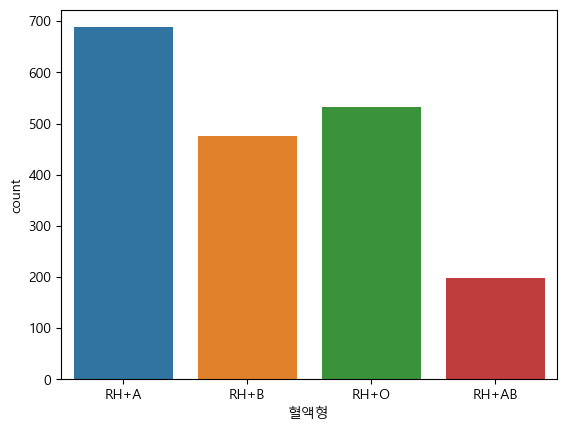

In [34]:
sns.countplot(data=df_ROSF, x='혈액형')

#### 신장, 체중


In [35]:
df_ROSF['신장'].describe()

count    1894.000000
mean      168.027983
std         9.211419
min       140.000000
25%       161.000000
50%       169.000000
75%       175.000000
max       204.000000
Name: 신장, dtype: float64

In [36]:
df_ROSF['체중'].describe()

count    1894.000000
mean       68.111140
std        11.234318
min        35.000000
25%        59.700000
50%        68.000000
75%        75.000000
max       136.100000
Name: 체중, dtype: float64

C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='신장'>

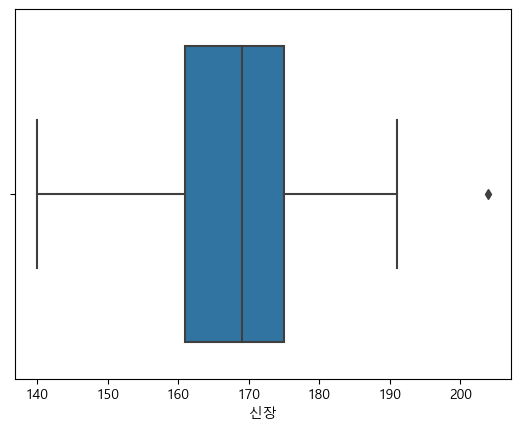

In [37]:
sns.boxplot(data=df_ROSF, x='신장')

C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='신장', ylabel='Count'>

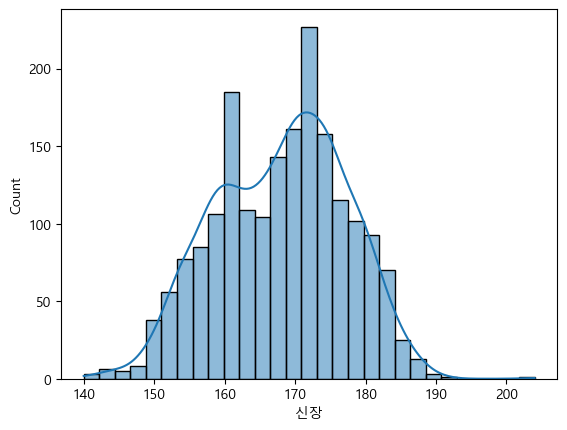

In [38]:
sns.histplot(data=df_ROSF, x='신장', kde=True)

C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='체중'>

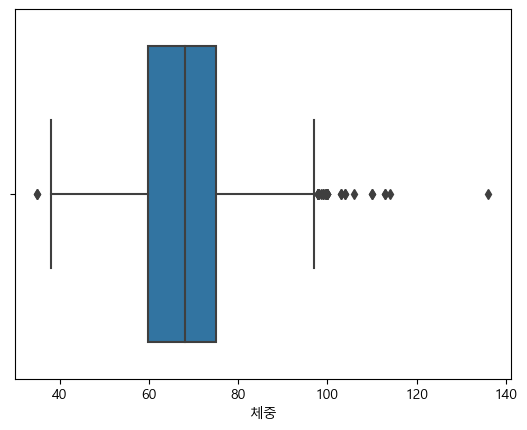

In [39]:
sns.boxplot(data=df_ROSF, x='체중')

C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\01-15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='체중', ylabel='Count'>

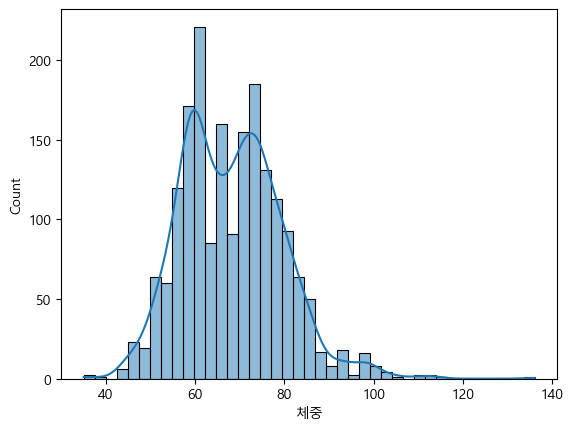

In [40]:
sns.histplot(data=df_ROSF, x='체중', kde=True)